<a href="https://colab.research.google.com/github/Jeru-John/ML-case-studies/blob/main/BFSI_loan_customer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Understanding the Problem:**

**PROJECT OBJECTIVE:**
Build an AIML model to perform focused marketing by predicting the potential customers who will get loan in the future using the historical dataset.

**Inference from seeing the data:**
1. This is a **`supervised learning`** problem. In supervised learning, the algorithm learns from labeled training data and makes predictions on new, unseen data based on patterns it learned during training.
2. the task involves predicting whether a customer will convert based on the provided dataset, making it a **`classification`** problem. Given that the target variable is binary, classification algorithms are suitable for this project.
3. Some datas are marked as **`unit is masked`** - This means that the actual values of those attributes are modified or concealed in some way to protect the privacy of the data or sensitive information.
4. It has **7 columns**: ID, Mortgage, Security, FixedDepositAccount, InternetBanking, CreditCard, LoanOnCard

**Importing libraries:**

In [ ]:
#Standard libraries for data analysis and data visualization:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # helps in data visulatization plot
import seaborn as sns # Enhancing the visual aesthetics of plots
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# from sklearn import feature_selection
from sklearn import model_selection

#sklearn modules for Model Selection:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,log_loss, classification_report, fbeta_score
from sklearn.model_selection import GridSearchCV

import seaborn as sns
from sklearn.metrics import confusion_matrix

import joblib #used to save and load Python objects efficiently.

# **Basic Preprocessing:**

**reading a dataset:**

In [ ]:
dataframe = pd.read_csv('/content/BFSI.csv')
print(dataframe.head()) # prints 1st 5 rows
print(dataframe.tail()) # prints last 5 rows

   ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0         0                    0                0           1   

   LoanOnCard  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
        ID  Mortgage  Security  FixedDepositAccount  InternetBanking  \
4995  4996         0         0                    0                1   
4996  4997        85         0                    0                1   
4997  4998         0         0                    0                0   
4998  4999         0         0                    0                1   
4999  5000         0         0                    0                1 

**Evaluating data structures of the dataset:**

In [ ]:
#Evaluating data structures:
print(dataframe.shape); # gives (no_of_rows, no_of_cols)
print(dataframe.size); # gives total no of values
print(dataframe.describe()); # gives count,mean and some details only for numerical values
print(dataframe.dtypes); # gives the datatypes of all cols respectively and the whole datatype of dataset
print(dataframe.info()); # gives no_of_values, null value detail, datatype of all cols

(5000, 7)
35000
                ID     Mortgage     Security  FixedDepositAccount  \
count  5000.000000  5000.000000  5000.000000           5000.00000   
mean   2500.500000    56.498800     0.104400              0.06040   
std    1443.520003   101.713802     0.305809              0.23825   
min       1.000000     0.000000     0.000000              0.00000   
25%    1250.750000     0.000000     0.000000              0.00000   
50%    2500.500000     0.000000     0.000000              0.00000   
75%    3750.250000   101.000000     0.000000              0.00000   
max    5000.000000   635.000000     1.000000              1.00000   

       InternetBanking   CreditCard   LoanOnCard  
count      5000.000000  5000.000000  4980.000000  
mean          0.596800     0.294000     0.096386  
std           0.490589     0.455637     0.295149  
min           0.000000     0.000000     0.000000  
25%           0.000000     0.000000     0.000000  
50%           1.000000     0.000000     0.000000  
75%  

Insights from evaluating the datastructure:

1. it contains 5000 - rows and 7 - columns
2. total no of values = 35000
3. every column contains of only int or float (categorical values)
4. LoanOnCard has 20 null values, which makes it values to 4980

In [ ]:
# Checking Null Values
dataframe.isnull().any()

ID                     False
Mortgage               False
Security               False
FixedDepositAccount    False
InternetBanking        False
CreditCard             False
LoanOnCard              True
dtype: bool

As told before `LoanOnCard` has null values.

# **Basic Data cleaning:**

In [ ]:
# make a new copy of the dataset:
data_copy = dataframe.copy()

**1. Handling missing values:**

**Imputing:** Filling the missing values in the column `LoanOnCard` with mean

In [ ]:
# Calculate the mean excluding missing values
mean_value = data_copy['LoanOnCard'].mean()

# Replace missing values with the mean value
data_copy['LoanOnCard'].fillna(mean_value, inplace=True)

# Check for empty values again
empty_values = data_copy['LoanOnCard'].isnull()
empty_string_indices = data_copy[empty_values].index
print(empty_string_indices)
print(len(empty_string_indices))
print(data_copy['LoanOnCard'].dtypes)

Int64Index([], dtype='int64')
0
float64


In [ ]:
# Checking Null Values again
data_copy.isnull().any()

ID                     False
Mortgage               False
Security               False
FixedDepositAccount    False
InternetBanking        False
CreditCard             False
LoanOnCard             False
dtype: bool

**Removing ID column:**

In [ ]:
data_copy = data_copy.drop(columns=['ID'])
print(data_copy.head())

   Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0         0         1                    0                0           0   
1         0         1                    0                0           0   
2         0         0                    0                0           0   
3         0         0                    0                0           0   
4         0         0                    0                0           1   

   LoanOnCard  
0    0.096386  
1    0.096386  
2    0.096386  
3    0.096386  
4    0.096386  


# **Data Exploration:**

**Check target variable distribution:**

In [ ]:
print(data_copy[['LoanOnCard']].value_counts())

LoanOnCard
0.000000      4500
1.000000       480
0.096386        20
dtype: int64


Insight:  Loans on cards are relatively rare among customers

**Univariate Analysis:**

Categorical column inferences:

In [ ]:
# List of categorical columns to plot
categorical_cols = ["Security", "FixedDepositAccount", "InternetBanking", "CreditCard", "LoanOnCard"]

In [ ]:
# Create a single figure for count plots
plt.figure(figsize=(15, 6))
for i, col in enumerate(categorical_cols, 1):
    print(data_copy[col].value_counts())

0    4478
1     522
Name: Security, dtype: int64
0    4698
1     302
Name: FixedDepositAccount, dtype: int64
1    2984
0    2016
Name: InternetBanking, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64
0.000000    4500
1.000000     480
0.096386      20
Name: LoanOnCard, dtype: int64


<Figure size 1500x600 with 0 Axes>

In [ ]:
# List of categorical columns to plot
categorical_cols = ["Security", "FixedDepositAccount", "InternetBanking", "CreditCard"]

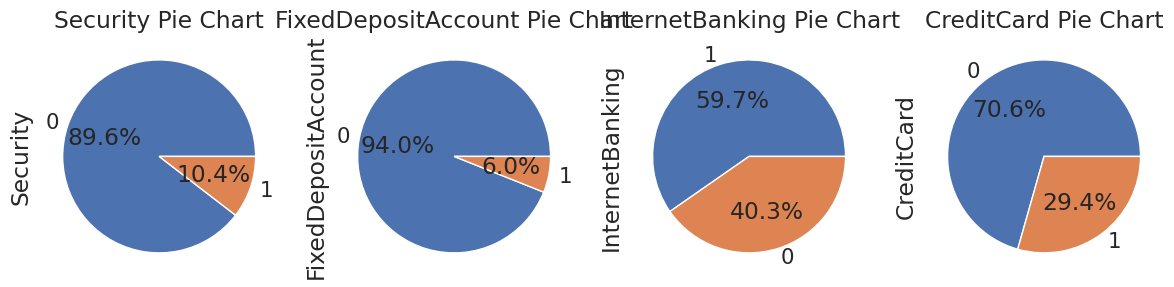

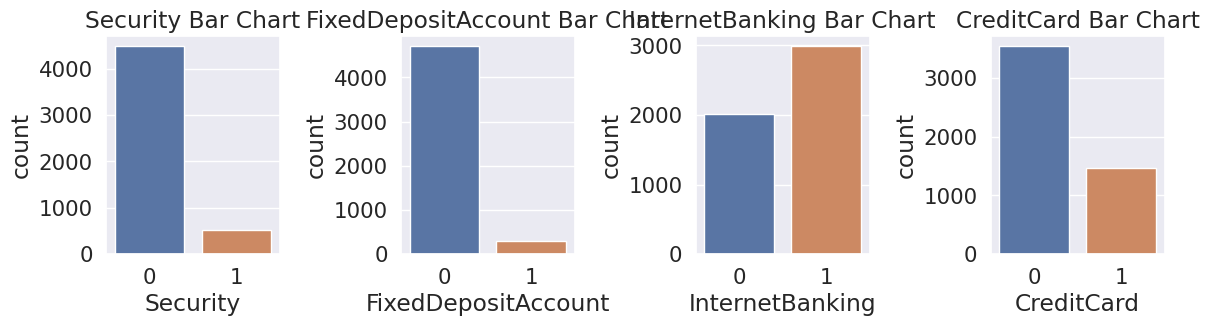

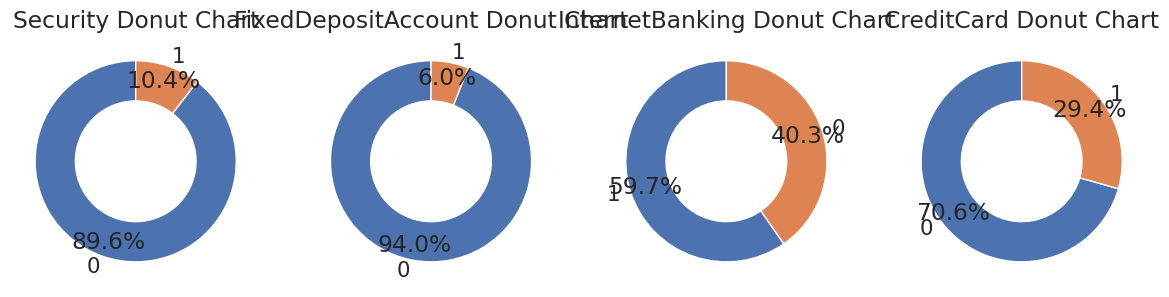

In [ ]:
# Create a single figure for pie charts
plt.figure(figsize=(15, 6)) #15 inch width, 6 inch height
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 5, i) #forms a grid of subplots
    data_copy[col].value_counts().plot.pie(autopct='%1.1f%%') #autopct -> format the percentage values displayed
    plt.title(f'{col} Pie Chart')
plt.tight_layout() #improves spacing
plt.show()

# Create a single figure for bar charts
plt.figure(figsize=(15, 6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 5, i)
    sns.countplot(x=col, data=data_copy)
    plt.title(f'{col} Bar Chart')
plt.tight_layout()
plt.show()


# Create a single figure for donut charts
plt.figure(figsize=(15, 6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 5, i)
    counts = data_copy[col].value_counts()
    #pctdistance - distance btn center and the percentage values displayed
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85,
            wedgeprops=dict(width=0.4, edgecolor='w'))
    #edgecolor - border color, width - width of the donut circle
    plt.title(f'{col} Donut Chart')
plt.tight_layout()
plt.show()

<ipython-input-89-48c8e59de415>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_copy[col], shade=True) #shade gives shading inside the plot
<ipython-input-89-48c8e59de415>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_copy[col], shade=True) #shade gives shading inside the plot
<ipython-input-89-48c8e59de415>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_copy[col], shade=True) #shade gives shading inside the plot
<ipython-input-89-48c8e59de415>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your co

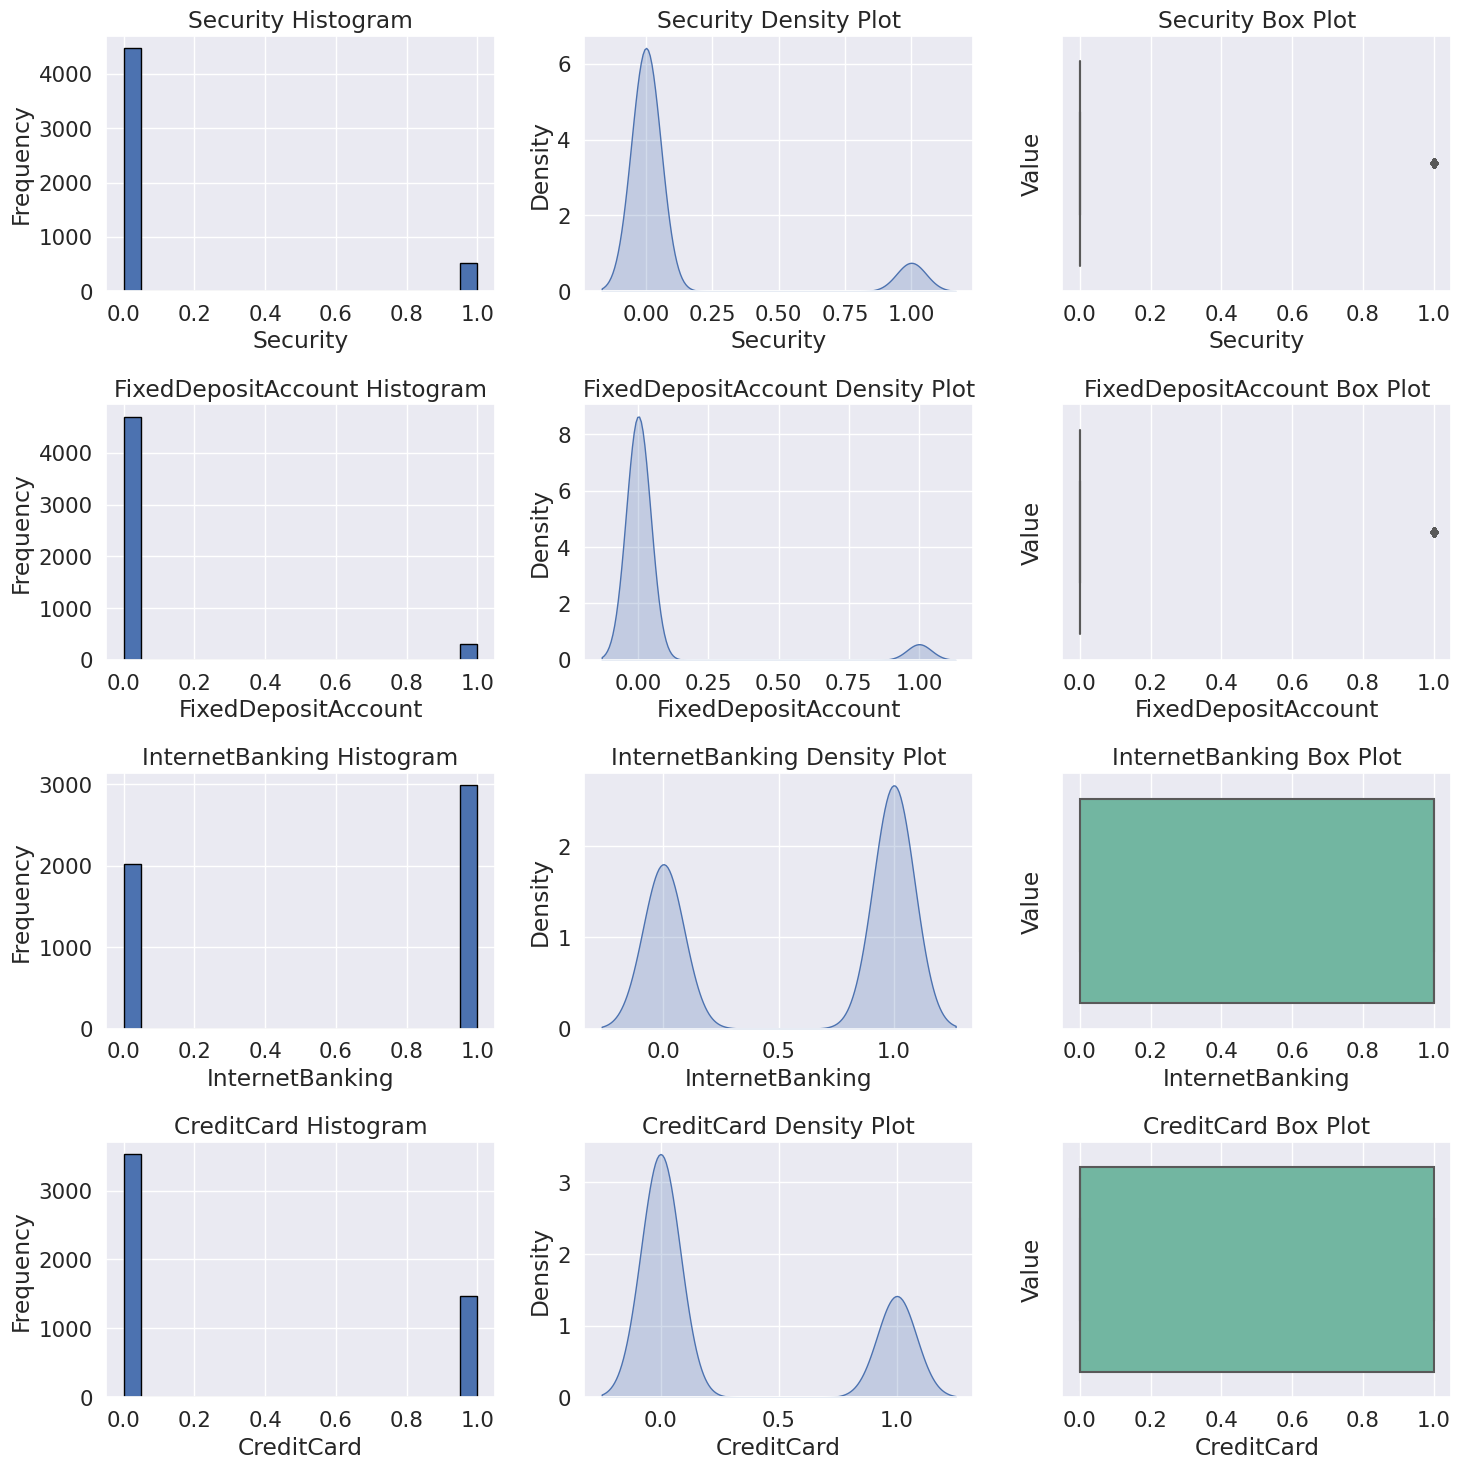

In [ ]:
# Create a figure with pairs of histograms and density plots for each categorical column
plt.figure(figsize=(15, 15))
num_cols = len(categorical_cols)

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_cols, 3, i*3-2)  # Histogram subplot
    plt.hist(data_copy[col], bins=20, edgecolor='black')
    plt.title(f'{col} Histogram')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(num_cols, 3, i*3-1)  # Density plot subplot
    sns.kdeplot(data_copy[col], shade=True) #shade gives shading inside the plot
    plt.title(f'{col} Density Plot')
    plt.xlabel(col)
    plt.ylabel('Density')

    plt.subplot(num_cols, 3, i*3)  # Box plot subplot
    sns.boxplot(x=col, data=data_copy, palette='Set2')
    plt.title(f'{col} Box Plot')
    plt.xlabel(col)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

Inferences:

1. Security: Most customers lack security features, with few prioritizing security.
2. Fixed Deposits: Customers rarely have fixed deposit accounts.
3. Internet Banking: Many customers use internet banking, indicating digital engagement.
4. Credit Cards: Credit card usage is common among customers.

Continuous variable column inference: [Mortgage]

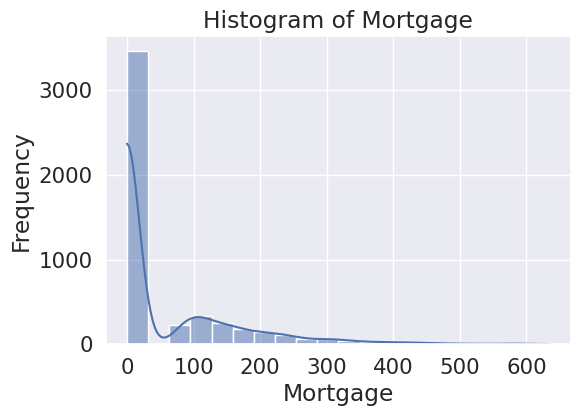

In [ ]:
# univariate for continuous variable of mortgage
plt.figure(figsize=(6, 4))
sns.histplot(data_copy['Mortgage'], bins=20, kde=True)  # Replace 'Age' with your continuous variable
plt.title('Histogram of Mortgage')
plt.xlabel('Mortgage')
plt.ylabel('Frequency')
plt.show()

Inference:
Mortgage has customers from values 80 to 400 with a small left skewness among that.

Target value inference: (LoanOnCustomer)

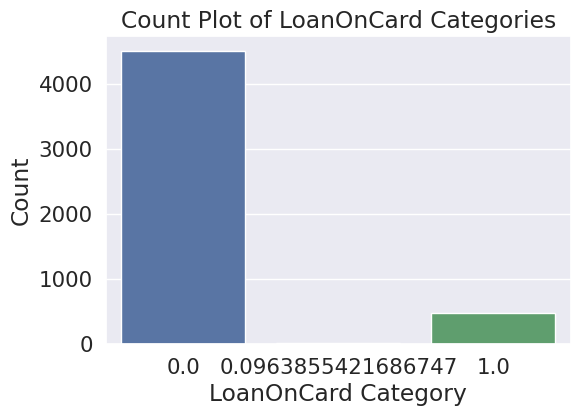

In [ ]:

plt.figure(figsize=(6, 4))
sns.countplot(data=data_copy, x='LoanOnCard')  # Replace 'LoanOnCard' with your categorical variable
plt.title('Count Plot of LoanOnCard Categories')
plt.xlabel('LoanOnCard Category')
plt.ylabel('Count')
plt.show()


Inference: Loan on Card (Target) - very Few customers have loans on their cards, which could influence loan-related marketing strategies.


**Overall Insights:**

1. The dataset portrays a customer base with varying levels of adoption for different financial services.
2. Internet banking and credit card usage are relatively prevalent, reflecting a digitally engaged customer segment.
3. Opportunities exist to promote security, fixed deposit accounts, and loans on cards based on low adoption.

**Bivariate Analysis:**

Bivariate analysis between categorical columns and the target column

In [ ]:
# List of categorical columns to plot
categorical_cols = ["Security", "FixedDepositAccount", "InternetBanking", "CreditCard"]
target_col = "LoanOnCard"  # Target variable for bivariate analysis

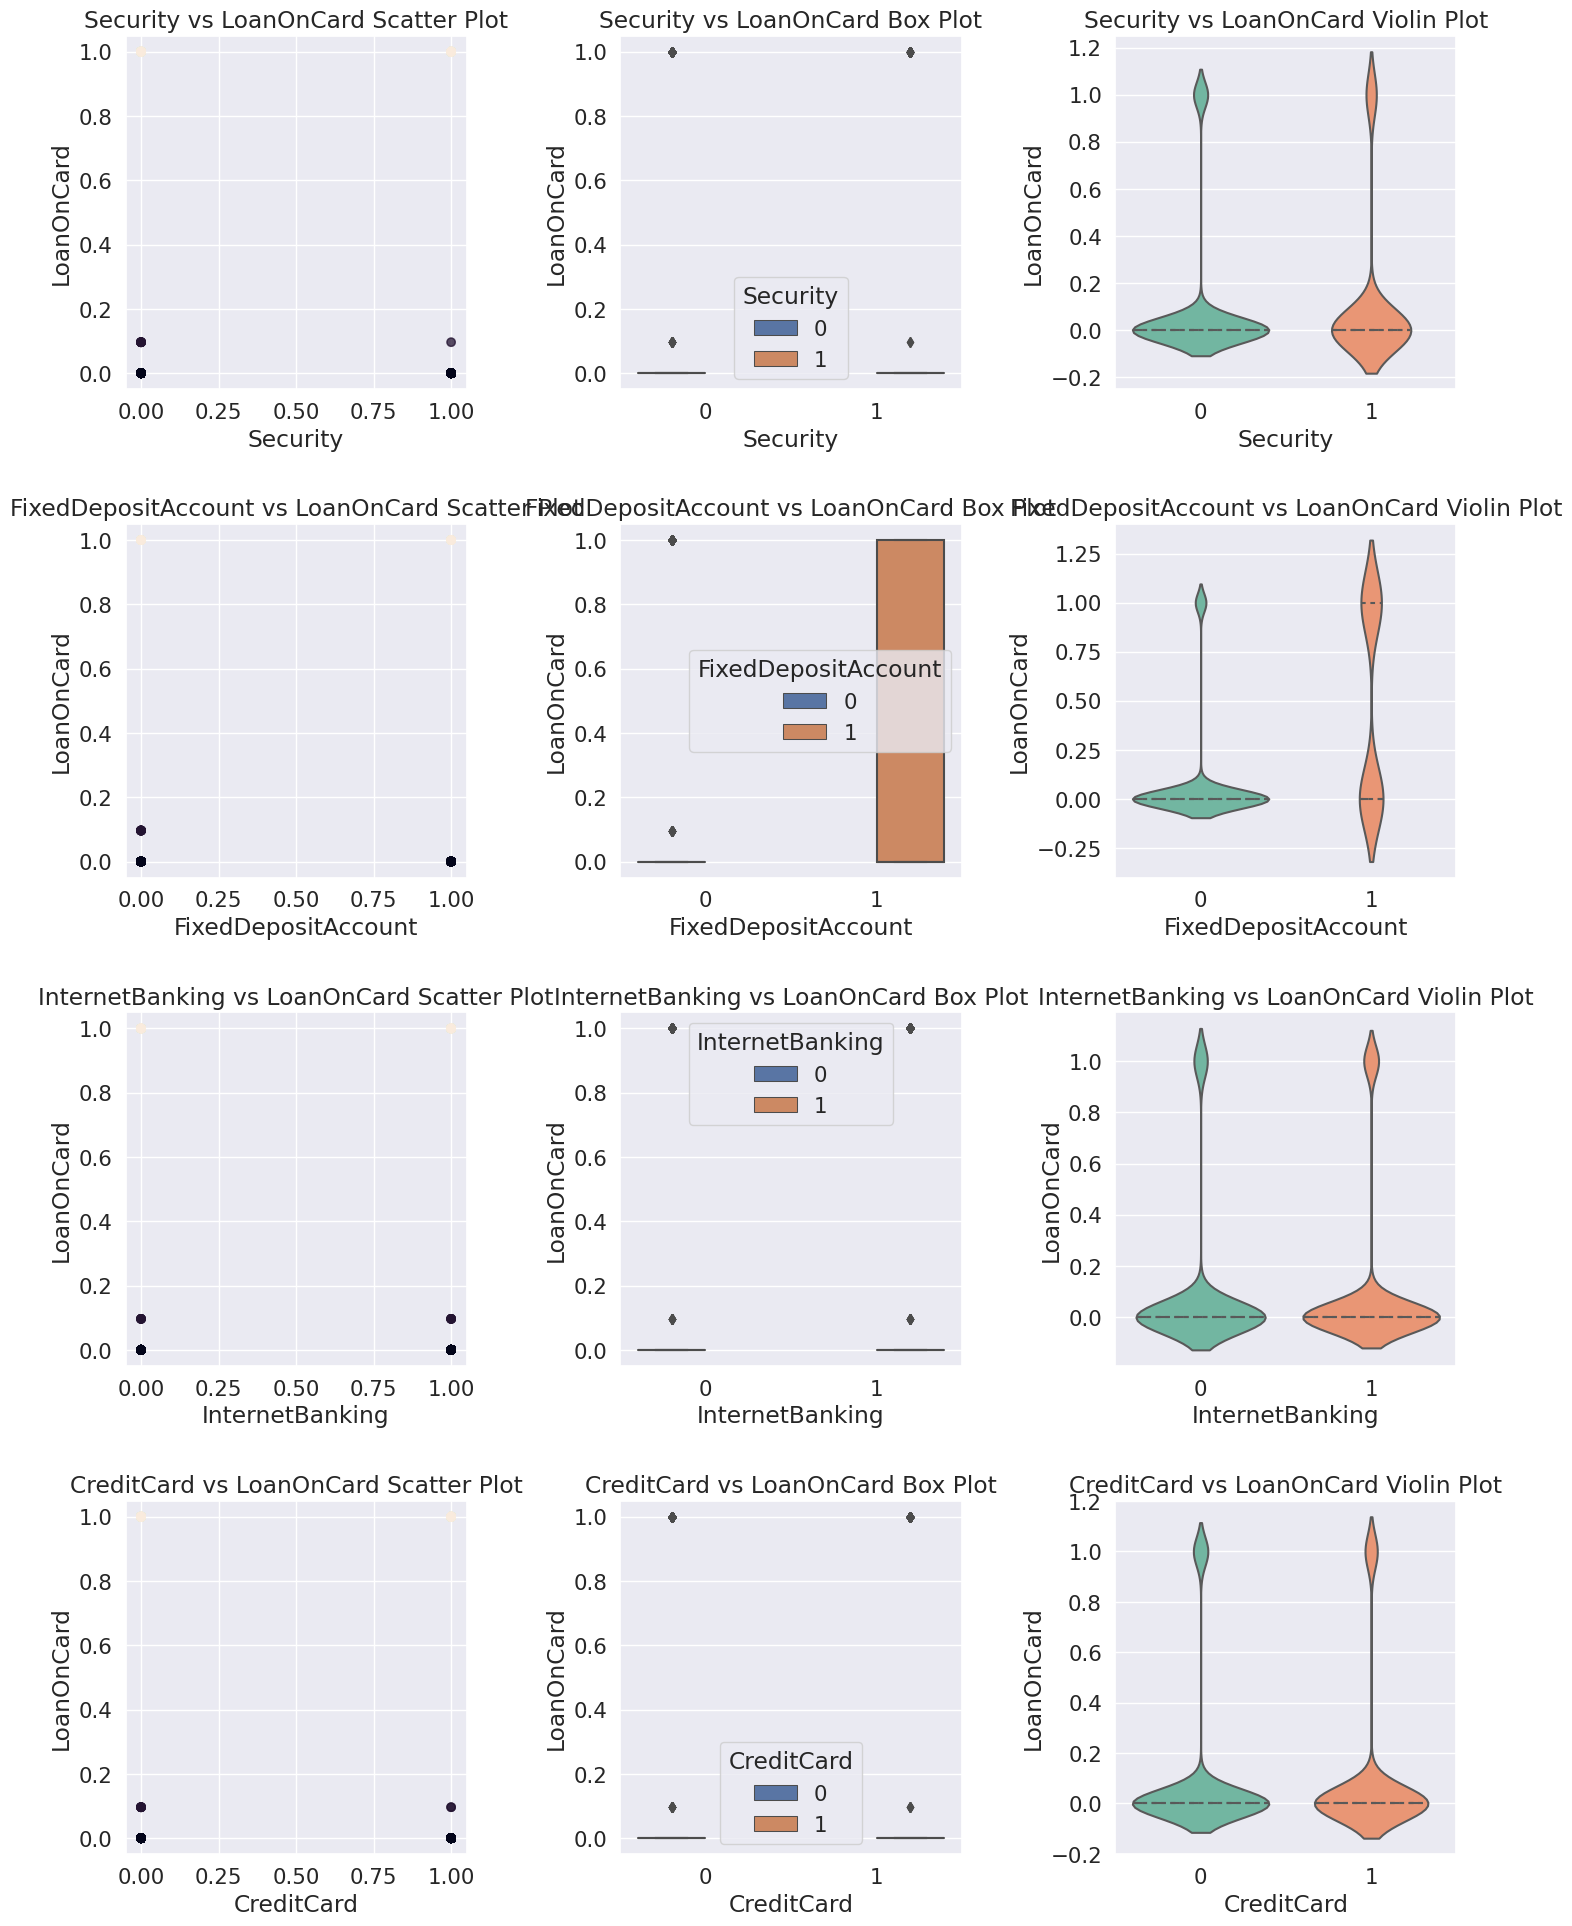

In [ ]:
# Create a figure with scatter plots, box plots, and additional bivariate plots
plt.figure(figsize=(15, 20))
num_cols = len(categorical_cols)

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_cols, 3, i*3-2)  # Scatter plot subplot
    plt.scatter(data_copy[col], data_copy[target_col], c=data_copy['LoanOnCard'], alpha=0.5)
    plt.title(f'{col} vs {target_col} Scatter Plot')
    plt.xlabel(col)
    plt.ylabel(target_col)

    plt.subplot(num_cols, 3, i*3-1)  # Box plot subplot
    sns.boxplot(x=col, y=target_col, hue=col, data=data_copy)
    plt.title(f'{col} vs {target_col} Box Plot')
    plt.xlabel(col)
    plt.ylabel(target_col)

    plt.subplot(num_cols, 3, i*3)  # Additional bivariate plot
    sns.violinplot(x=col, y=target_col, data=data_copy, inner='quartile',palette='Set2')
    plt.title(f'{col} vs {target_col} Violin Plot')
    plt.xlabel(col)
    plt.ylabel(target_col)

plt.tight_layout(pad=2.0)  # Adjust padding between subplots
plt.show()


<ipython-input-94-a2921c5ea004>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_cols[0], y=target_col, data=data_copy, ci=None)
<ipython-input-94-a2921c5ea004>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_cols[1], y=target_col, data=data_copy, ci=None)
<ipython-input-94-a2921c5ea004>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_cols[2], y=target_col, data=data_copy, ci=None)
<ipython-input-94-a2921c5ea004>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_cols[3], y=target_col, data=data_copy, ci=None)


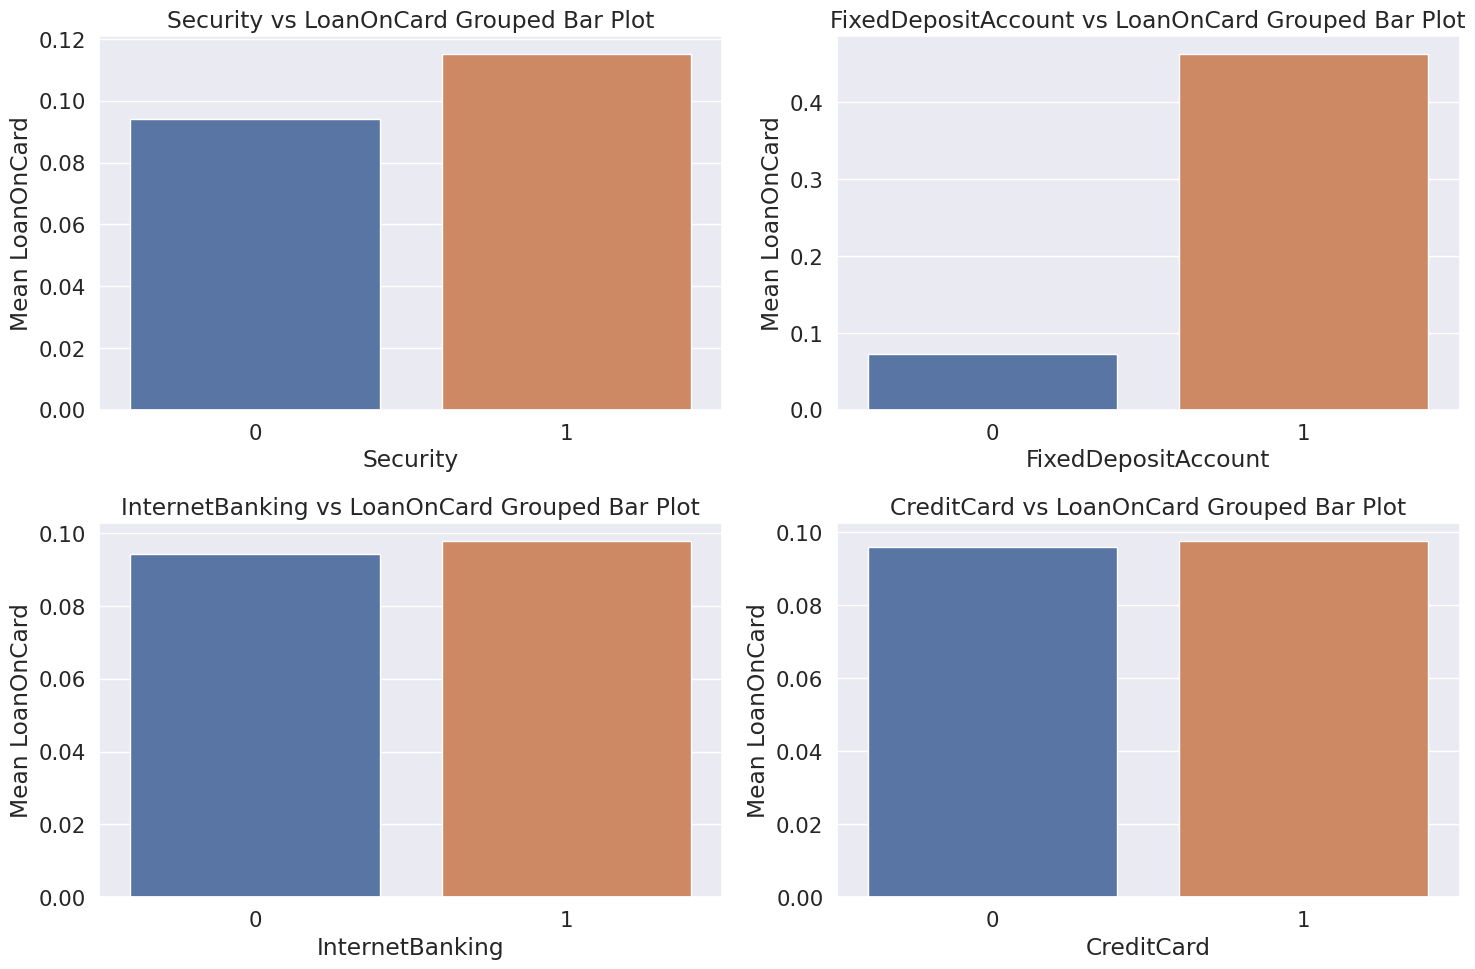

In [ ]:
# Create a figure with two rows of grouped bar plots
plt.figure(figsize=(15, 10))

# Plot first row
plt.subplot(2, 2, 1)
sns.barplot(x=categorical_cols[0], y=target_col, data=data_copy, ci=None)
#ci=None means no confidence interval (used if confidence intervals are too small to be visible)
plt.title(f'{categorical_cols[0]} vs {target_col} Grouped Bar Plot')
plt.xlabel(categorical_cols[0])
plt.ylabel('Mean ' + target_col)

plt.subplot(2, 2, 2)
sns.barplot(x=categorical_cols[1], y=target_col, data=data_copy, ci=None)
plt.title(f'{categorical_cols[1]} vs {target_col} Grouped Bar Plot')
plt.xlabel(categorical_cols[1])
plt.ylabel('Mean ' + target_col)

# Plot second row
plt.subplot(2, 2, 3)
sns.barplot(x=categorical_cols[2], y=target_col, data=data_copy, ci=None)
plt.title(f'{categorical_cols[2]} vs {target_col} Grouped Bar Plot')
plt.xlabel(categorical_cols[2])
plt.ylabel('Mean ' + target_col)

plt.subplot(2, 2, 4)
sns.barplot(x=categorical_cols[3], y=target_col, data=data_copy, ci=None)
plt.title(f'{categorical_cols[3]} vs {target_col} Grouped Bar Plot')
plt.xlabel(categorical_cols[3])
plt.ylabel('Mean ' + target_col)

plt.tight_layout()
plt.show()

<ipython-input-95-b8664b5e7ace>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_cols[subplot_idx - 1], y=target_col, data=data_copy, ci=None, palette=custom_palette)
<ipython-input-95-b8664b5e7ace>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_cols[subplot_idx - 1], y=target_col, data=data_copy, ci=None, palette=custom_palette)
<ipython-input-95-b8664b5e7ace>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_cols[subplot_idx - 1], y=target_col, data=data_copy, ci=None, palette=custom_palette)
<ipython-input-95-b8664b5e7ace>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=categorical_cols[subplot_idx - 1], y=target_col, data=data_copy, ci=None, palette=custom_palette)


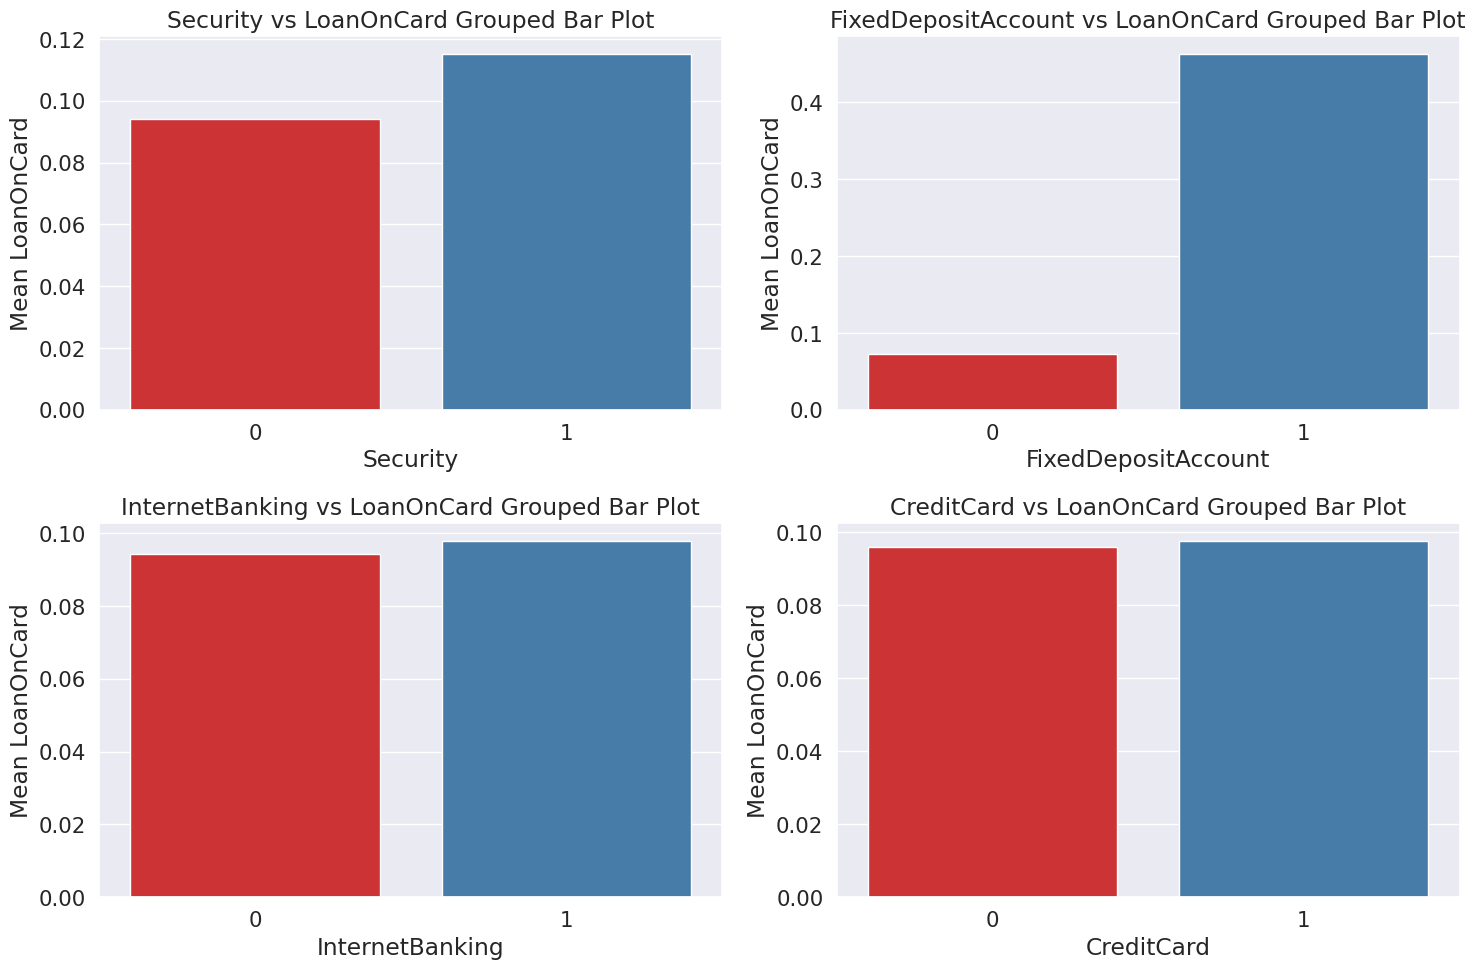

In [ ]:
# Define a custom color palette
custom_palette = sns.color_palette("Set1")

plt.figure(figsize=(15, 10))

rows = 2
cols = 2
subplot_idx = 1

for row in range(rows):
    for col in range(cols):
        plt.subplot(rows, cols, subplot_idx)
        sns.barplot(x=categorical_cols[subplot_idx - 1], y=target_col, data=data_copy, ci=None, palette=custom_palette)
        plt.title(f'{categorical_cols[subplot_idx - 1]} vs {target_col} Grouped Bar Plot')
        plt.xlabel(categorical_cols[subplot_idx - 1])
        plt.ylabel('Mean ' + target_col)

        subplot_idx += 1

plt.tight_layout()
plt.show()


**Loan Amount Difference with Security:** The mean loan amount on the card is higher for customers with a "`Security`" value of 1 compared to those with a "Security" value of 0. This could imply that customers who have more secure transactions (Security=1) are eligible for higher loan amounts on their cards.

**Loan Amount Difference with FixedDepositAccount:** For "FixedDepositAccount" value of 0, the mean "LoanOnCard" is relatively low, indicating that customers without a fixed deposit account tend to have lower loan amounts on their cards.

**Loan Amount Difference with InternetBanking:** For "InternetBanking" value of 1, the mean "LoanOnCard" is slightly higher, suggesting that customers with internet banking have access to slightly larger loan amounts on their cards.

**Loan Amount Difference with CreditCard:** For "CreditCard" value of 1, the mean "LoanOnCard" is slightly higher, suggesting that customers with CreditCard have access to slightly larger loan amounts on their cards.

CreditCard                                           0         1
Security FixedDepositAccount InternetBanking                    
0        0                   0                0.090718  0.095425
                             1                0.089465  0.000146
         1                   0                     NaN  1.000000
                             1                1.000000  0.521739
1        0                   0                0.065197  0.000000
                             1                0.000000       NaN
         1                   0                1.000000  0.583333
                             1                0.673913  0.116279


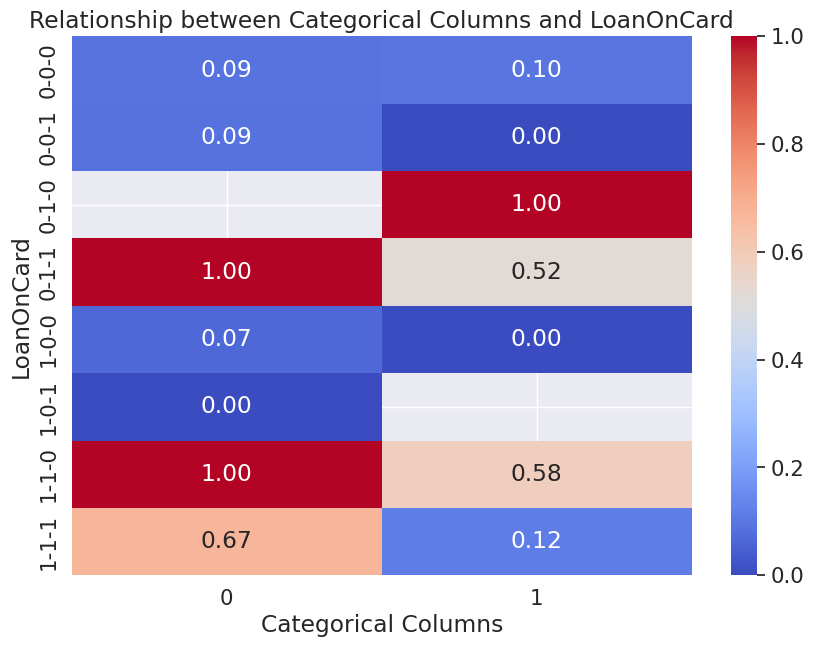

In [ ]:
# List of categorical columns to plot
categorical_cols = ["Security", "FixedDepositAccount", "InternetBanking", "CreditCard"]
target_col = "LoanOnCard"  # Target variable for bivariate analysis

# Create a heatmap to visualize the relationship between categorical columns and the target variable
plt.figure(figsize=(10, 7))
heatmap_data = data_copy.groupby(categorical_cols)[target_col].mean().unstack()
#unstack() - create a new DataFrame object where the categorical columns are now the column index and the mean values are contained in the cells.
print(heatmap_data)
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".2f")
#cmap - sets color, annot - specifies whether to display the cell values or not
#fmt-format string (.2f - 2 digits after decimal point in labels)
plt.title(f'Relationship between Categorical Columns and {target_col}')
plt.xlabel('Categorical Columns')
plt.ylabel(target_col)
plt.show()

**Inference: (Based on Combinations of categorical columns)**

1. Increasing customers with FixedDepositAccounts has an higher impact on increasing LoanOnCustomers.

2. Less security for customers has an higher impact on decreasing LoanOnCustomers.

3. Less InternetBanking combination has an higher impact on decreasing LoanOnCustomers.



Bivariate analysis between the continuous variable column Mortgage with target column:

<ipython-input-97-c43212420dc2>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Mortgage', y=target_col, data=data_copy, ci=None)


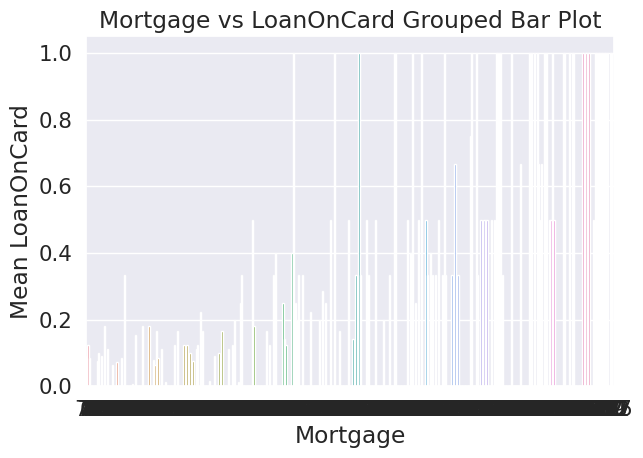

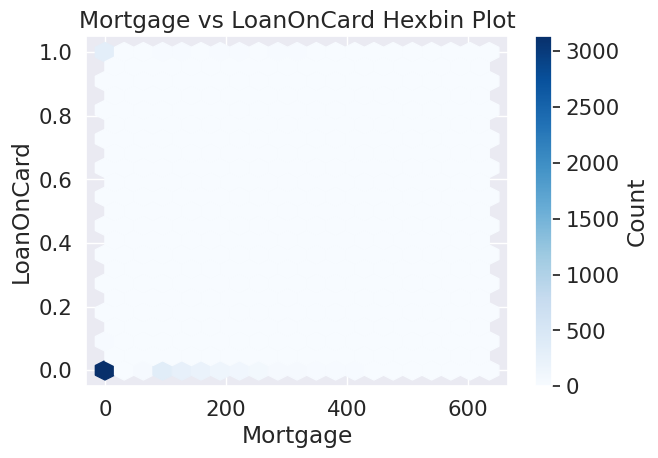

In [ ]:
plt.figure(figsize=(15, 10))

# Plot first row
plt.subplot(2, 2, 1)
sns.barplot(x='Mortgage', y=target_col, data=data_copy, ci=None)
#ci=None means no confidence interval (used if confidence intervals are too small to be visible)
plt.title(f'Mortgage vs {target_col} Grouped Bar Plot')
plt.xlabel('Mortgage')
plt.ylabel('Mean ' + target_col)

plt.figure(figsize=(15, 10))

# Plot first row
plt.subplot(2, 2, 1)
plt.hexbin(data_copy['Mortgage'], data_copy[target_col], gridsize=20, cmap='Blues')
plt.title(f'Mortgage vs {target_col} Hexbin Plot')
plt.xlabel('Mortgage')
plt.ylabel(target_col)
plt.colorbar(label='Count')  # Add colorbar for count scale
plt.show()

**Multivariate Analysis:**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/

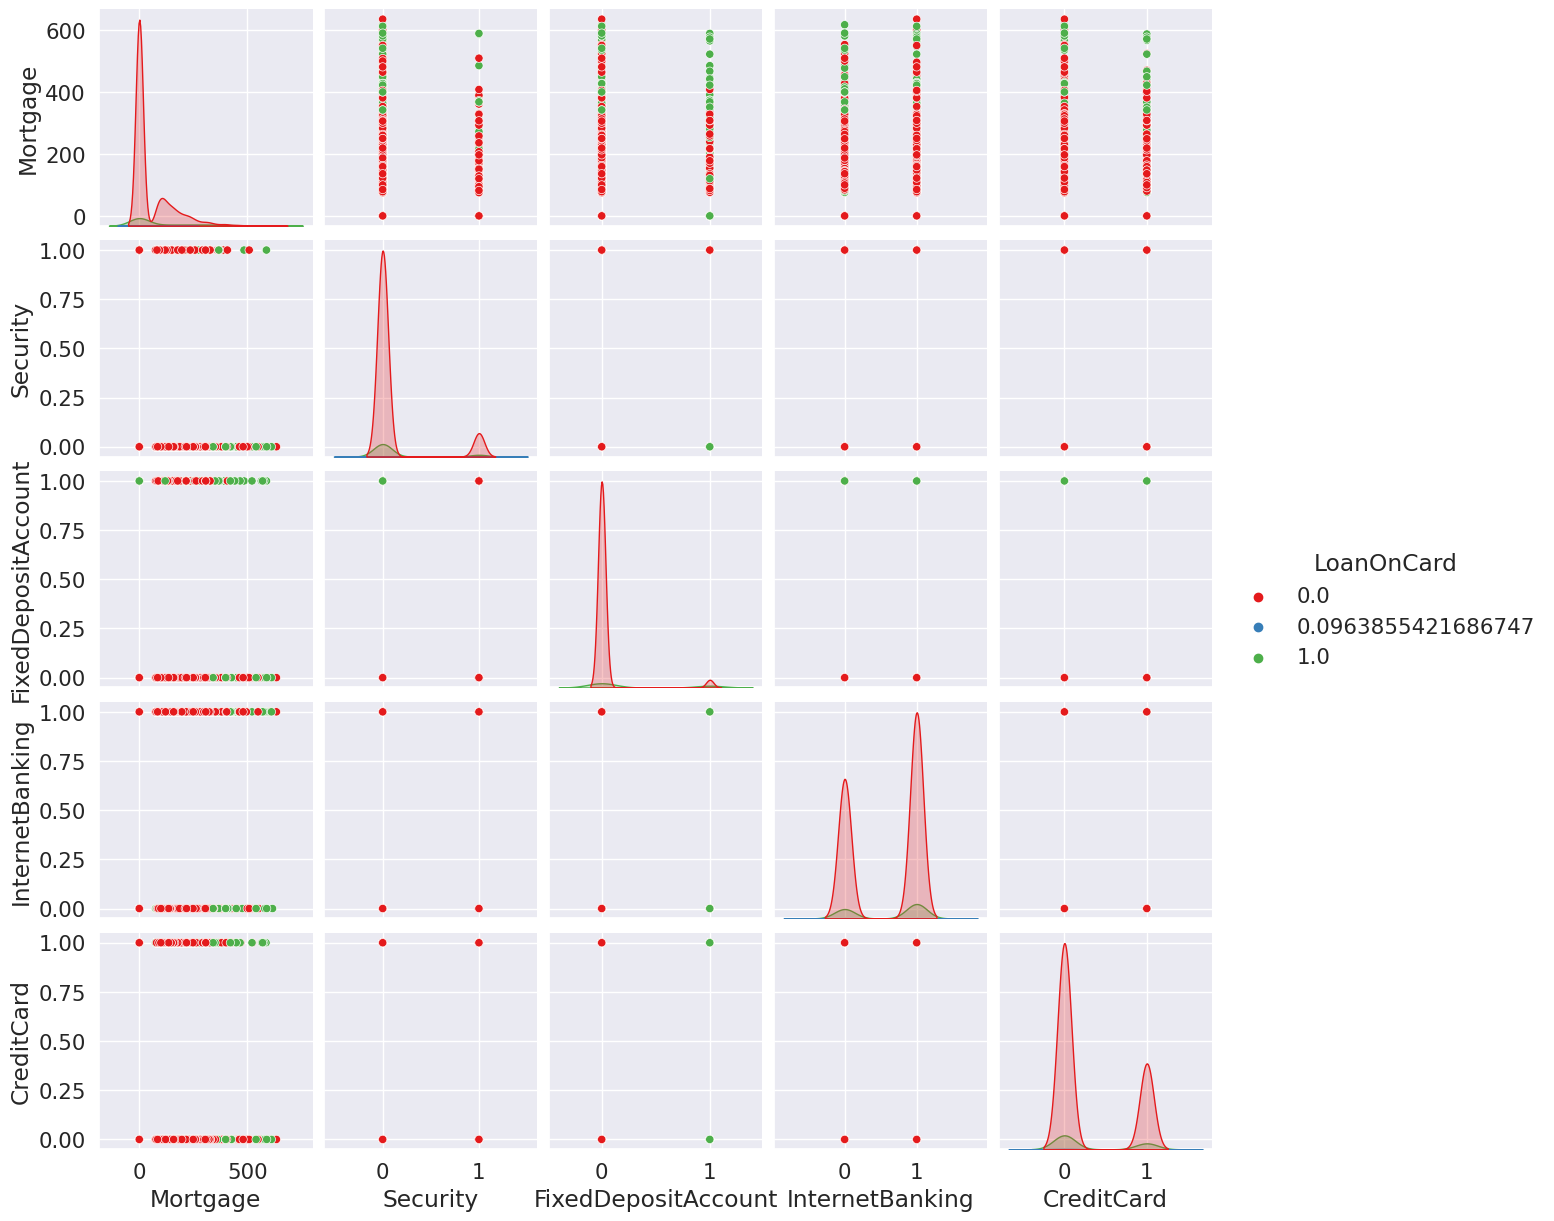

In [ ]:
custom_palette = sns.color_palette("Set1")
# sns.pairplot(Clean_data);
sns.pairplot(data_copy,hue=target_col, palette=custom_palette);
#hue - to know the relationships between the numerical variables differ based on the target variable's categories
plt.show()

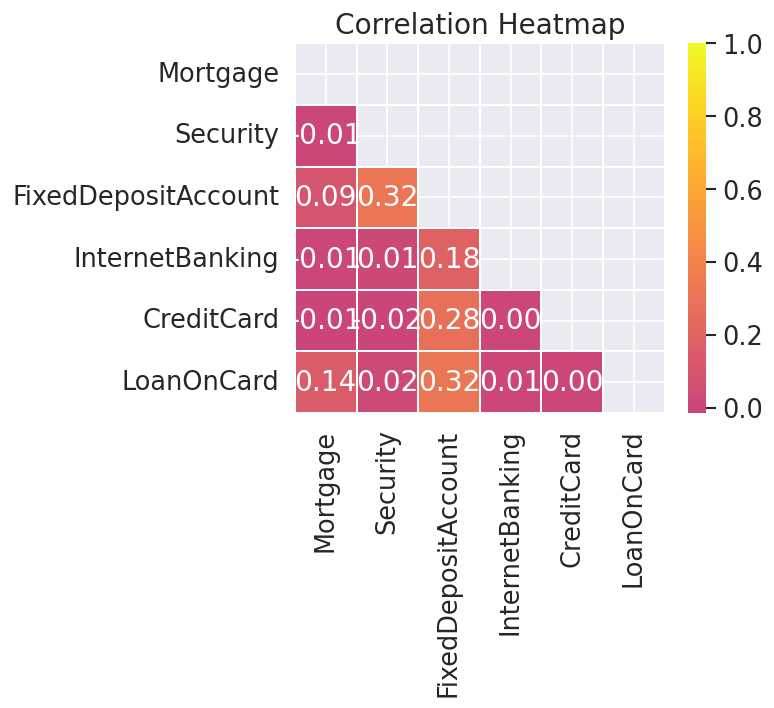

In [ ]:
#Correlation matrix helps us to discover the bivariate relationship between independent variables in a dataset.

plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(data_copy.corr()))
sns.heatmap(data_copy.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma',vmax=1, center=0,square=True, linewidths=1)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

# **Data Preprocessing:**

In [ ]:
#Target column
target_col = ["LoanOnCard"]

#categorical columns
cat_cols   = data_copy.nunique()[data_copy.nunique() < 10].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
column_indexes = [data_copy.columns.get_loc(col) for col in cat_cols]
print(column_indexes)
print(cat_cols);

#numerical columns
num_cols   = [x for x in data_copy.columns if x not in cat_cols + target_col]
print(num_cols);

#Binary columns with 2 values
bin_cols   = data_copy.nunique()[data_copy.nunique() == 2].keys().tolist()
print(bin_cols);

[1, 2, 3, 4]
['Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard']
['Mortgage']
['Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard']


In [ ]:
print(data_copy.columns)

Index(['Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')


**To drop irrelavant cols based on correlation:**

check for correlation of cols
using correlation matrix and p_values find out the correlation threshold based on significance level.

In [ ]:
# Calculate correlation coefficients and p-values
correlation_matrix = data_copy.corr()
p_values = np.zeros_like(correlation_matrix.values)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        if i != j:
            corr, p_value = pearsonr(data_copy.iloc[:, i], data_copy.iloc[:, j])
            correlation_matrix.values[i, j] = corr
            p_values[i, j] = p_value

# Set the desired significance level
significance_level = 0.02

# Find the correlation threshold based on significance level
threshold = np.min(np.abs(correlation_matrix.values[p_values < significance_level]))

# Print the correlation threshold
print(f"Correlation threshold based on significance level ({significance_level}): {threshold}")

Correlation threshold based on significance level (0.02): 0.08931105824156726


a correlation coefficient of 0.08931105824156726 or higher indicates a statistically significant linear relationship between the variables being studied, at the 0.05 significance level.

In [ ]:
# Compute the correlation matrix
correlation_matrix = data_copy.corr()

# Identify columns with low correlation with the target variable
threshold = 0.0893  # Set a correlation threshold below which columns are considered to have low correlation
irrelevant_columns = correlation_matrix[abs(correlation_matrix['LoanOnCard']) < threshold].index.tolist()

# Print the irrelevant columns
print(irrelevant_columns)

['Security', 'InternetBanking', 'CreditCard']


**drop the insignificant columns:**

In [ ]:
# Dropping the irrelevant columns
significant_data = data_copy.drop(columns=irrelevant_columns)

# Print the modified DataFrame
print(significant_data.columns)
print(significant_data)

Index(['Mortgage', 'FixedDepositAccount', 'LoanOnCard'], dtype='object')
      Mortgage  FixedDepositAccount  LoanOnCard
0            0                    0    0.096386
1            0                    0    0.096386
2            0                    0    0.096386
3            0                    0    0.096386
4            0                    0    0.096386
...        ...                  ...         ...
4995         0                    0    0.000000
4996        85                    0    0.000000
4997         0                    0    0.000000
4998         0                    0    0.000000
4999         0                    0    0.000000

[5000 rows x 3 columns]


# **Splitting test and train data:**

In [ ]:
X = data_copy[['Mortgage', 'FixedDepositAccount']]  # Features
y = data_copy['LoanOnCard']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (4000, 2)
y_train dataset:  (4000,)
X_test dataset:  (1000, 2)
y_test dataset:  (1000,)


# **Scaling:**

In [ ]:
#Feature Scaling:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2


print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)


X_train dataset:  (4000, 2)
y_train dataset:  (4000,)
X_test dataset:  (1000, 2)
y_test dataset:  (1000,)


Original X_train summary statistics:
 Mortgage              -6.750156e-17
FixedDepositAccount    5.595524e-17
dtype: float64 Mortgage               1.0
FixedDepositAccount    1.0
dtype: float64

Original X_test summary statistics:
 Mortgage              -0.033200
FixedDepositAccount    0.008422
dtype: float64 Mortgage               0.907763
FixedDepositAccount    1.015448
dtype: float64

Scaled X_train summary statistics:
 [1.15463195e-17 2.53130850e-17] [1. 1.]

Scaled X_test summary statistics:
 [-0.03319973  0.00842152] [0.9077628  1.01544805]


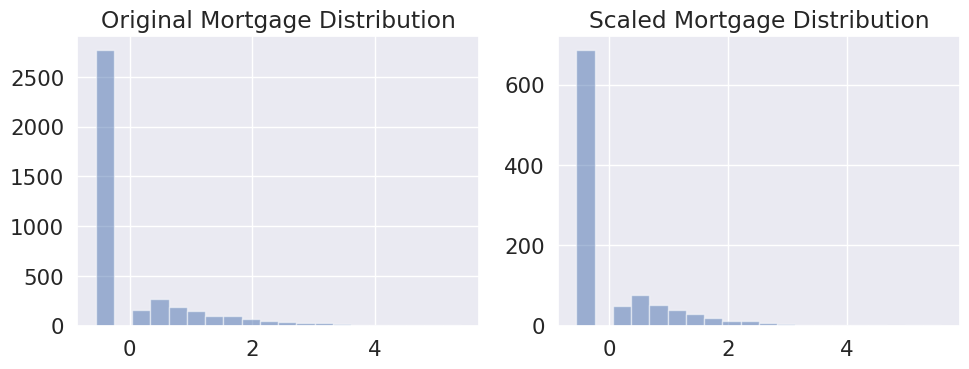

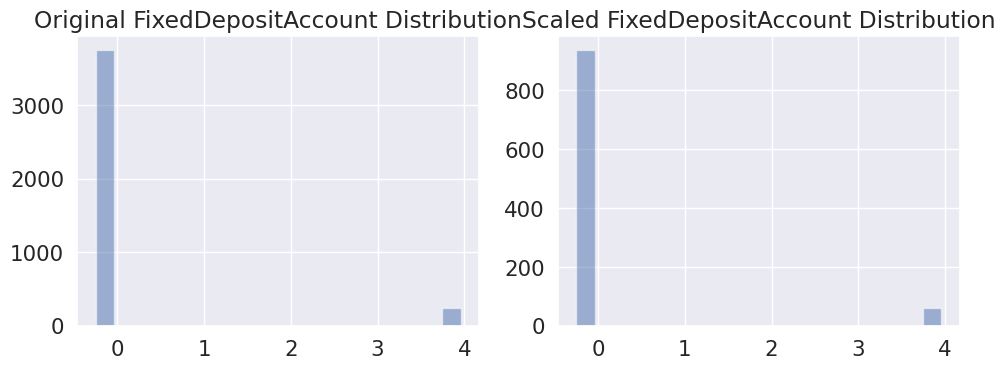

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set features using the same scaler
X_test_scaled = scaler.transform(X_test)

# Summary statistics before scaling
print("Original X_train summary statistics:\n", np.mean(X_train, axis=0), np.std(X_train, axis=0))
print("\nOriginal X_test summary statistics:\n", np.mean(X_test, axis=0), np.std(X_test, axis=0))

# Summary statistics after scaling
print("\nScaled X_train summary statistics:\n", np.mean(X_train_scaled, axis=0), np.std(X_train_scaled, axis=0))
print("\nScaled X_test summary statistics:\n", np.mean(X_test_scaled, axis=0), np.std(X_test_scaled, axis=0))

# Visualization
for i, col in enumerate(X_train.columns):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.hist(X_train_scaled[:, i], bins=20, alpha=0.5, label='Original')
    plt.title(f'Original {col} Distribution')

    plt.subplot(1, 2, 2)
    plt.hist(X_test_scaled[:, i], bins=20, alpha=0.5, label='Scaled')
    plt.title(f'Scaled {col} Distribution')

    plt.tight_layout()
    plt.show()


Inference: The summary statistics of the scaled features (mean close to zero and standard deviation of 1.0) indicate that standard scaling has been applied successfully.

# **Model Selection:**

In [ ]:
# Convert 'LoanOnCard' into binary classes
threshold = 0.5  # Choose an appropriate threshold
y_train = (y_train > threshold).astype(int)
y_test = (y_test > threshold).astype(int)

models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
# accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(
    model, X_train, y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(
    model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                            round(cv_auc_results.mean()*100, 2),
                            round(cv_auc_results.std()*100, 2),
                            round(cv_acc_results.mean()*100, 2),
                            round(cv_acc_results.std()*100, 2)
                            ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
6,Random Forest,66.54,5.09,90.50,2.00
3,KNN,66.43,4.17,90.12,1.54
4,Gaussian NB,66.05,3.36,89.33,1.19
0,Logistic Regression,66.03,3.37,82.55,1.62
5,Decision Tree Classifier,62.00,4.40,90.80,1.83
2,Kernel SVM,56.20,5.95,91.22,1.66
1,SVC,45.28,10.20,90.62,1.61


**Inference from the model selection 1st iteration:** Among the algorithms you tested, the "Random Forest" algorithm has the highest mean ROC AUC score (66.54) and a relatively low standard deviation (5.09), suggesting it performs reasonably well and consistently across the folds.

**Get the right parameters for the baseline models:**

1. Identify the optimal number of K neighbors for KNN Model:

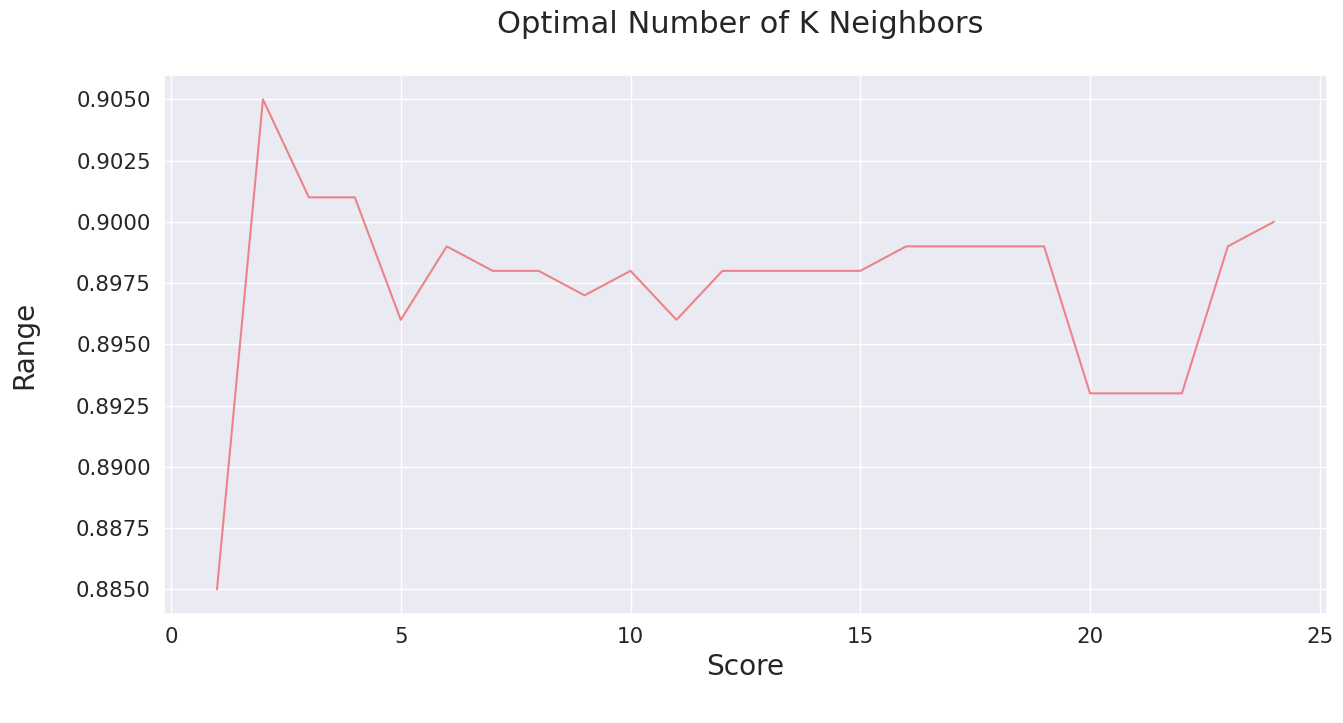

In [ ]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each)
#set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',
horizontalalignment="center", fontstyle = "normal",
 fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [ ]:
score_array = []
for each in range(1, 25):
    knn_loop = KNeighborsClassifier(n_neighbors=each)
    knn_loop.fit(X_train, y_train)
    score_array.append(knn_loop.score(X_test, y_test))

# Find the index of the maximum score
optimal_k = score_array.index(max(score_array)) + 1
print("Optimal K value:", optimal_k)

Optimal K value: 2


2. Identify the optimal number of trees for Random Forest Model:

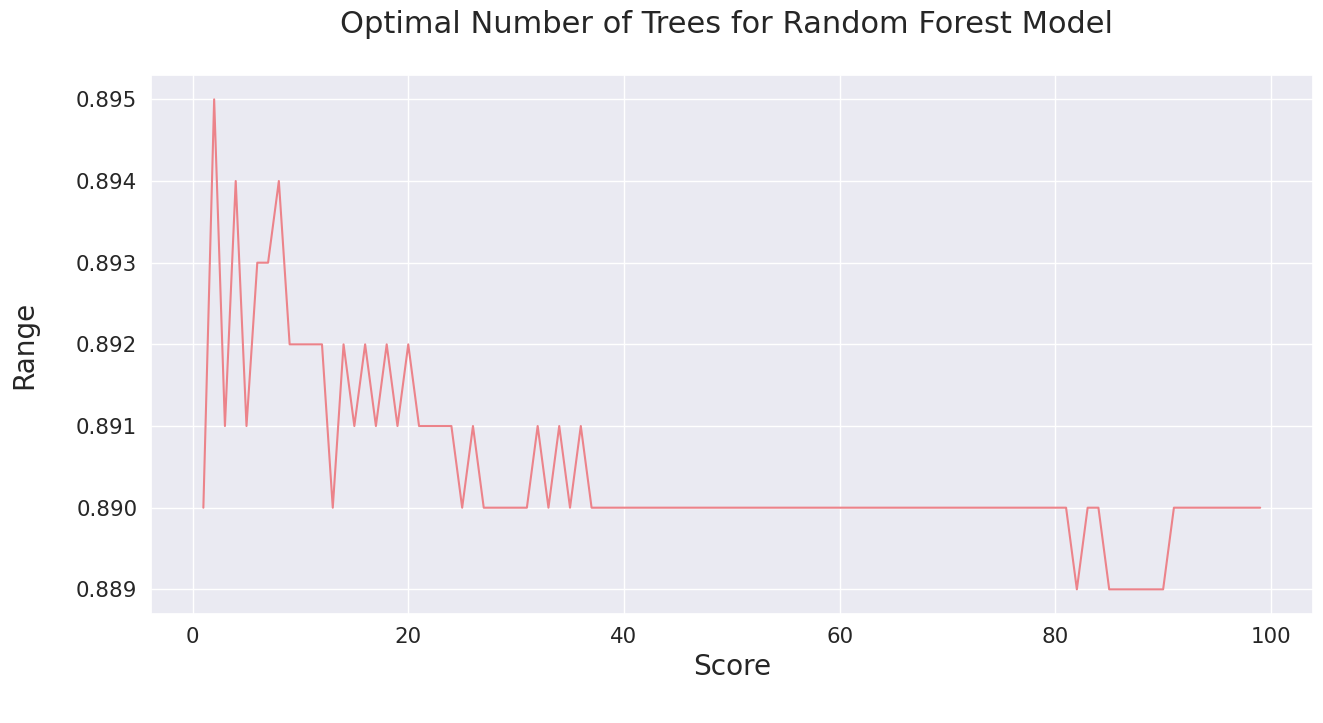

In [ ]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(
n_estimators = each, random_state = 1)
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))

fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [ ]:
score_array = []
for each in range(1, 100):
    rf_loop = RandomForestClassifier(n_estimators=each, random_state=1)
    rf_loop.fit(X_train, y_train)
    score_array.append(rf_loop.score(X_test, y_test))

# Find the index of the maximum score
optimal_n_estimators = score_array.index(max(score_array)) + 1
print("Optimal number of trees:", optimal_n_estimators)


Optimal number of trees: 2


# **Hypertuning:**

Logistic Regression:

In [ ]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression',
acc, prec, rec, f1, f2]], columns = ['Model',
'Accuracy', 'Precision', 'Recall', 'F1 Score',
'F2 Score'])
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression     0.895        0.5  0.066667  0.117647  0.080645


Support Vector Machine (linear classifier):

In [ ]:
# Fitting SVM (SVC class) to the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame(
[['SVM (Linear)', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression     0.895        0.5  0.066667  0.117647  0.080645
1         SVM (Linear)     0.895        0.5  0.066667  0.117647  0.080645


<ipython-input-114-3ec558e5e71f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


Kernel SVM:

In [ ]:
# Fitting KNN to the Training set:
classifier = KNeighborsClassifier(
n_neighbors = 2,
metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred  = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['K-Nearest Neighbours',
acc, prec, rec, f1, f2]], columns = ['Model',
 'Accuracy', 'Precision', 'Recall',
 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
2  K-Nearest Neighbours     0.905   0.608696  0.266667  0.370861  0.300429
0   Logistic Regression     0.895   0.500000  0.066667  0.117647  0.080645
1          SVM (Linear)     0.895   0.500000  0.066667  0.117647  0.080645


<ipython-input-115-7c1180297221>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


Naive Bayes:

In [ ]:
# Fitting Naive Byes to the Training set:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Naive Byes', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  K-Nearest Neighbours     0.905   0.608696  0.266667  0.370861  0.300429
1   Logistic Regression     0.895   0.500000  0.066667  0.117647  0.080645
2          SVM (Linear)     0.895   0.500000  0.066667  0.117647  0.080645
3            Naive Byes     0.891   0.472973  0.333333  0.391061  0.354251


<ipython-input-116-349b5f166f0c>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


Decision Tree:

In [ ]:
# Fitting Decision Tree to the Training set:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Decision Tree', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  K-Nearest Neighbours     0.905   0.608696  0.266667  0.370861  0.300429
1   Logistic Regression     0.895   0.500000  0.066667  0.117647  0.080645
2          SVM (Linear)     0.895   0.500000  0.066667  0.117647  0.080645
3            Naive Byes     0.891   0.472973  0.333333  0.391061  0.354251
4         Decision Tree     0.889   0.333333  0.057143  0.097561  0.068493


<ipython-input-117-e61789e4e0d9>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


Random Forest:

In [ ]:
#Fitting Random Forest to the Training set:

classifier = RandomForestClassifier(n_estimators = 2,
criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest',
acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  K-Nearest Neighbours     0.905   0.608696  0.266667  0.370861  0.300429
1   Logistic Regression     0.895   0.500000  0.066667  0.117647  0.080645
2          SVM (Linear)     0.895   0.500000  0.066667  0.117647  0.080645
3            Naive Byes     0.891   0.472973  0.333333  0.391061  0.354251
5         Random Forest     0.891   0.375000  0.057143  0.099174  0.068807
4         Decision Tree     0.889   0.333333  0.057143  0.097561  0.068493


<ipython-input-118-bce8f52235f9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


**Inference from the model selection 2nd interation:** The K-Nearest Neighbours model seems to perform the best in terms of accuracy, precision, recall, and F1 score, indicating a good balance between correctly predicting positive cases and overall accuracy.

Model Selection Result:

```
Algorithm       ROC AUC Mean   ROC AUC STD   Accuracy Mean   Accuracy STD
Random Forest   66.54           5.09          90.50           2.00
KNN             66.43           4.17          90.12           1.54
Gaussian NB     66.05           3.36          89.33           1.19
Logistic Reg... 66.03           3.37          82.55           1.62
Decision Tree   62.00           4.40          90.80           1.83
Kernel SVM      56.20           5.95          91.22           1.66
SVC             45.28           10.20         90.62           1.61
```

Model Evaluation Result:

```
Model                  Accuracy   Precision     Recall       F1 Score     F2 Score
K-Nearest Neighbours   0.905      0.608696      0.266667     0.370861     0.300429
Logistic Regression    0.895      0.500000      0.066667     0.117647     0.080645
SVM (Linear)           0.895      0.500000      0.066667     0.117647     0.080645
Naive Byes             0.891      0.472973      0.333333     0.391061     0.354251
Random Forest          0.891      0.375000      0.057143     0.099174     0.068807
Decision Tree          0.889      0.333333      0.057143     0.097561     0.068493
```

**Comparing the inferences:**

Top Performing Model:

Model Selection: The "Random Forest" algorithm had the highest ROC AUC mean and relatively high accuracy mean.
Model Evaluation: The "K-Nearest Neighbours" model has the highest accuracy, precision, and recall.


# **Hypertuning among KNN and Random Forest:**
Train & evaluate Chosen Model:

In [ ]:
# Fitting KNN to the Test set:
classifier = KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2)
classifier.fit(X_test, y_test)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2.0)

# Create a DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

# Append the KNN model's results to the DataFrame
model_results = pd.DataFrame([['K-Nearest Neighbours', acc, prec, rec, f1, f2]],
                              columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index=True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending=False)

# Print the results
print(results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  K-Nearest Neighbours       0.9        1.0  0.047619  0.090909  0.058824


<ipython-input-135-5b4227c64b6e>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index=True)


In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'metric': ['minkowski'],
    'p': [1, 2]
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning on the training set
grid_search.fit(X_train, y_train)

# Get the best-tuned KNN model from GridSearchCV
best_knn = grid_search.best_estimator_

# Predict on the test set
y_pred = best_knn.predict(X_test)

# Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2.0)

# Create a DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

# Append the KNN model's results to the DataFrame
model_results = pd.DataFrame([['K-Nearest Neighbours (Tuned)', acc, prec, rec, f1, f2]],
                              columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index=True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending=False)

# Print the results
print(results)


                          Model  Accuracy  Precision    Recall  F1 Score  \
0  K-Nearest Neighbours (Tuned)     0.905   0.608696  0.266667  0.370861   

   F2 Score  
0  0.300429  


<ipython-input-120-218d30e249cb>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index=True)


In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2)

# Perform cross-validation with 5 folds and 'accuracy' scoring
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.90375 0.90125 0.89625 0.90875 0.9125 ]
Mean Accuracy: 0.9045


With a mean accuracy of around 90.45%, the KNN model appears to be reasonably accurate.

In [ ]:
# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')

# Fit the model to the training set
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2.0)

# Create a DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

# Append the Random Forest model's results to the DataFrame
model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
                              columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index=True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending=False)

# Print the results
print(results)


           Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Random Forest     0.876   0.385542  0.304762  0.340426  0.318091


<ipython-input-127-65abbc62a241>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index=True)


Based on the evaluation metrics you've provided for different models and scenarios, let's compare and determine the best-performing model:

```
K-Nearest Neighbours (n_neighbors = 2):

Accuracy: 0.9
Precision: 1.0
Recall: 0.047619
F1 Score: 0.090909
F2 Score: 0.058824

K-Nearest Neighbours (n_neighbors = 100):

Accuracy: 0.895
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
F2 Score: 0.0

K-Nearest Neighbours (Tuned):

Accuracy: 0.905
Precision: 0.608696
Recall: 0.266667
F1 Score: 0.370861
F2 Score: 0.300429

Random Forest without Class Weight:

Accuracy: 0.876
Precision: 0.385542
Recall: 0.304762
F1 Score: 0.340426
F2 Score: 0.318091

Random Forest with Class Weight Balanced:

Accuracy: 0.889
Precision: 0.35
Recall: 0.066667
F1 Score: 0.112
F2 Score: 0.079545
```

Inference:

Based on the provided metrics, the K-Nearest Neighbours (Tuned) model seems to be the best-performing option. It has the highest accuracy, relatively high precision, and a reasonable recall value. The F1 and F2 scores also suggest a balanced trade-off between precision and recall. Therefore, the K-Nearest Neighbours model with hypertuning (using the best-tuned parameters) could be the best choice among the models you've evaluated.

# **Model Evaluation on test data:**

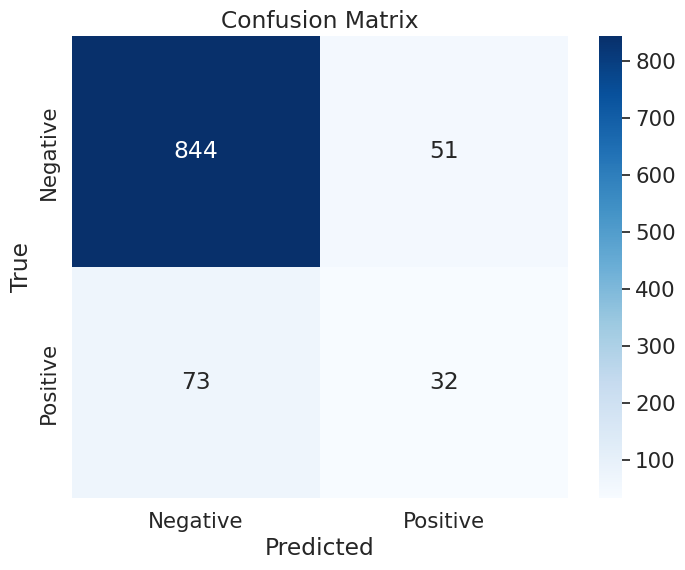

In [ ]:
# Fit the KNN model to the test set
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

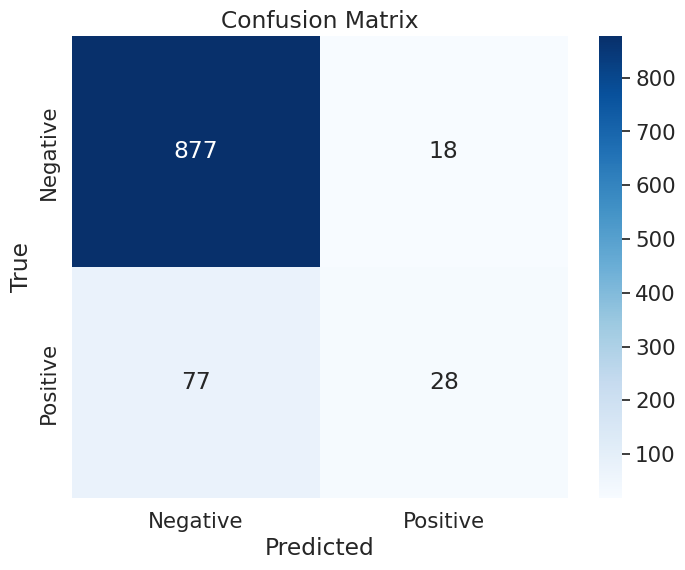

In [ ]:
# Fit the KNN model to the test set
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Inference: Chosen model is KNN

In [ ]:
# Perform grid search for hyperparameter tuning using cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best-tuned model
best_knn = grid_search.best_estimator_ #extracts the best-tuned KNN model (best_estimator_) based on the F1 score.

# Save the best-tuned KNN model to a file
model_filename = 'best_knn_model.joblib'
joblib.dump(best_knn, model_filename) #model is saved as a binary file
print("Trained model saved as:", model_filename)


Trained model saved as: best_knn_model.joblib


In [ ]:
# Load the trained KNN model from the saved file
loaded_model = joblib.load(model_filename)
print(loaded_model)

KNeighborsClassifier(n_neighbors=1)
